<a href="https://colab.research.google.com/github/kshitijain902/Machine_learning/blob/main/kaggle_fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/dataset/fish.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
x=df.iloc[:,[2,3,4,5,6]].values
y=df.iloc[:,1].values


In [ ]:
print(f"{x.shape , y.shape}")

((159, 5), (159,))


In [ ]:
x_train=x[:-60]

In [ ]:
print(x_train.shape)

(99, 5)


In [ ]:
x_test=x[-60:]

In [ ]:
print(x_test.shape)

(60, 5)


In [ ]:
y_train=y[:-60]

In [ ]:
y_test=y[-60:]

In [ ]:
print(y_train.shape,y_test.shape)

(99,) (60,)


In [ ]:
u=np.mean(x,axis=0)
std=np.std(x,axis=0)
x_train=(x_train-u)/std
x_test=(x_test-u)/std

In [ ]:
print(x_train.shape,x_test.shape)
print(u.shape)

(99, 5) (60, 5)
(5,)


In [ ]:
a=np.mean(y,axis=0)
print(a)

398.3264150943396


In [ ]:
print(a.shape)
b=np.std(y,axis=0)

()


In [ ]:
print(b)

356.8508229894959


In [ ]:
y_test=(y_test-a)/b

In [ ]:
y_train=(y_train-a)/b

In [ ]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

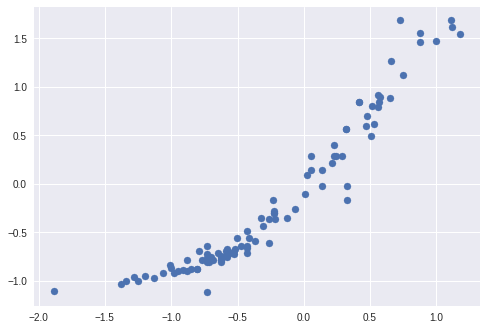

In [ ]:
plt.style.use('seaborn')
plt.scatter(x_train[:, 0], y_train)
plt.show()

In [ ]:
ones=np.ones((x_train.shape[0],1))
x_train=np.hstack((ones,x_train))

In [ ]:
print(x_train[:5,])

[[ 1.         -0.30578858 -0.28230301 -0.10602023  0.59657867 -0.23652895]
 [ 1.         -0.22550724 -0.19805366 -0.00233668  0.82126055 -0.06657895]
 [ 1.         -0.23554241 -0.17933159 -0.01097698  0.79734129  0.16579317]
 [ 1.          0.0053016   0.05469437  0.19639012  0.87977146  0.022621  ]
 [ 1.          0.02537193  0.05469437  0.23959159  0.81283498  0.42637127]]


In [ ]:
def hypothesis(x, theta):
    return np.dot(x, theta)

In [ ]:
def cost(X, Y, theta):
    m = X.shape[0]
    total_error = 0

    y_p = hypothesis(X, theta)
    total_error = np.sum((y_p - Y)**2)

    return total_error/m

In [ ]:
def gradient(X, Y, theta):

    y_p = hypothesis(X, theta)

    grad = np.dot(X.T, (y_p - Y))

    return grad/X.shape[0]

In [ ]:
def gradient_descent(X, Y, learning_rate = 0.01, max_steps = 600):

    m, n = X.shape
    theta = np.zeros((n, ))
    cost_epoch = []

    for i in range(max_steps):

        grad = gradient(X, Y, theta)

        e = cost(X, Y, theta)
        cost_epoch.append(e)

        theta = theta - learning_rate*grad

    return theta, cost_epoch

In [ ]:
theta, cost_epoch = gradient_descent(x_train, y_train)

In [ ]:
theta

array([-0.09534404,  0.18291541,  0.18671057,  0.17925426,  0.23260861,
        0.20752172])

In [ ]:
cost_epoch

[0.6433076929369167,
 0.6089115912587875,
 0.5764968587695,
 0.5459492788824355,
 0.5171612208850846,
 0.49003126014706844,
 0.4644638202308447,
 0.4403688356419464,
 0.4176614340284413,
 0.3962616367079588,
 0.3760940764653067,
 0.3570877316246665,
 0.33917567545779476,
 0.3222948400437829,
 0.3063857937469439,
 0.2913925315274516,
 0.2772622773446559,
 0.26394529795567845,
 0.2513947274521119,
 0.23956640191554823,
 0.2284187036083729,
 0.21791241414992044,
 0.20801057615979804,
 0.19867836288006935,
 0.18988295531615323,
 0.18159342646282783,
 0.1737806322067376,
 0.16641710852036742,
 0.15947697458465007,
 0.15293584149830156,
 0.14677072625169554,
 0.14095997066166857,
 0.1354831649811592,
 0.13032107591408126,
 0.12545557878138214,
 0.1208695935988857,
 0.11654702484132856,
 0.11247270468000639,
 0.10863233949370812,
 0.10501245946416807,
 0.10160037107815326,
 0.09838411236856077,
 0.0953524107365684,
 0.09249464320599039,
 0.08980079896957457,
 0.08726144409506663,
 0.084867688

In [ ]:
ones=np.ones((x_test.shape[0],1))
x_test=np.hstack((ones,x_test))


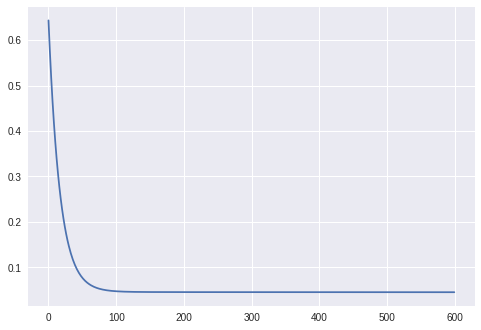

In [ ]:
plt.plot(cost_epoch)

In [ ]:
y_pred_test=[]
for i in range(x_test.shape[0]):
    pred=hypothesis(x_test[i],theta)
    y_pred_test.append(pred)
y_pred_test=np.array(y_pred_test)

In [ ]:
for i in range(len(y_pred_test)):
    print(y_pred_test[i],y_test[i])

-0.5163164675450882 -0.6118142400942878
-0.4136952641048846 -0.5641752859296776
-0.3336291086254064 -0.5053271660792769
-0.11959384826371985 -0.2755392695205691
-0.2713266734542526 -0.3876309263784753
-0.2776200024319487 -0.373619469271237
-0.23648280250717996 -0.41565384059295185
-0.22625738779714977 -0.41565384059295185
-0.14438139586737986 -0.2755392695205691
-0.06343337818859751 -0.219493441091616
0.35759479711935016 0.3241510946692291
0.5115213146821052 0.4418473343700306
0.7827905897744772 1.2376980980611647
0.7147497937019969 0.8033429277367781
0.6651529282870344 0.8453772990584929
0.6623387158418588 0.8453772990584929
0.6608871200288343 0.8173543848440163
0.9331446891962466 1.4058355833480238
0.7490974238365626 0.7052627279861101
0.9863802943087103 1.1816522696322116
0.9672312470695418 1.2657210122756413
0.9759982943109456 1.4058355833480238
1.0391955729656734 1.7280990968145042
0.8719660870769309 1.1816522696322116
1.0944174203564698 1.966293867637555
1.1391333776727004 1.6860

In [ ]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE',metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print('Accuracy',metrics.explained_variance_score(y_test,y_pred_test))

MAE 0.42420635746881774
MSE 0.2853797682665831
RMSE 0.5342094797610607
Accuracy 0.8511513757979069
